# **Supervised Learning**


## **Latihan SKLearn Decision Tree**

**Tujuan**

Pada latihan ini, kita akan melakukan klasifikasi data yang kita miliki dengan teknik Decision Tree menggunakan dataset iris, salah satu dataset paling populer yang sering digunakan untuk belajar machine learning.

**Tahapan Latihan**

Dataset iris terdiri dari 4 atribut yaitu panjang sepal, lebar sepal, panjang petal, dan lebar petal. Terdapat 3 kelas target pada dataset ini. Data ini digunakan untuk masalah klasifikasi, di mana kita memprediksi jenis spesies sebuah bunga berdasarkan atribut-atribut yang diberikan.

Tahapan yang ada pada latihan ini antara lain:

1. Ubah dataset ke dalam dataframe.

2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label. 

3. Bagi dataset menjadi data latih dan data uji.

4. Buat dan latih model Decision Tree.

5. Lakukan pengujian model dengan menggunakan data uji. 

6. Lakukan prediksi dengan model yang telah dilatih.

7. Visualisasi model Decision Tree yang telah dilatih.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# membaca dataset iris.csv yang telah diupload, kalau terhapus, upload ulang, filenya ada di folder machine learning pemula -> supervised learning -> sklearn decision tree
iris = pd.read_csv("Iris.csv")

In [ ]:
#melihat informasi dataaset
iris.info()

#melihat infomasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# menghilangkan kolom tidak penting (kolom Id)
iris.drop('Id',axis=1, inplace=True)

In [ ]:
#memisahkan atribut dan label
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris["Species"]

#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state = 123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# membuat model decision tree
tree_model = DecisionTreeClassifier()

# melatih model dengan menggunakan data latih
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
# evaluasi model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_score = round(accuracy_score(y_pred,y_test),2) # angka 2 menandakan jumlah angka dibelakang koma

print("Akurasi = ",acc_score)

In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])
print(tree_model.predict([[5.2, 2.8, 1.8, 0.33]])[0])

Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab (jika Anda menggunakan Google Colab).

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Untuk mengunduh berkas iris_tree.dot pada gambar di atas, kita dapat melakukan klik kanan pada berkas tersebut kemudian mengunduhnya.

Jika kita ingin melihat visualisasi decision tree, lakukan konversi dot file ke dalam file png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/.

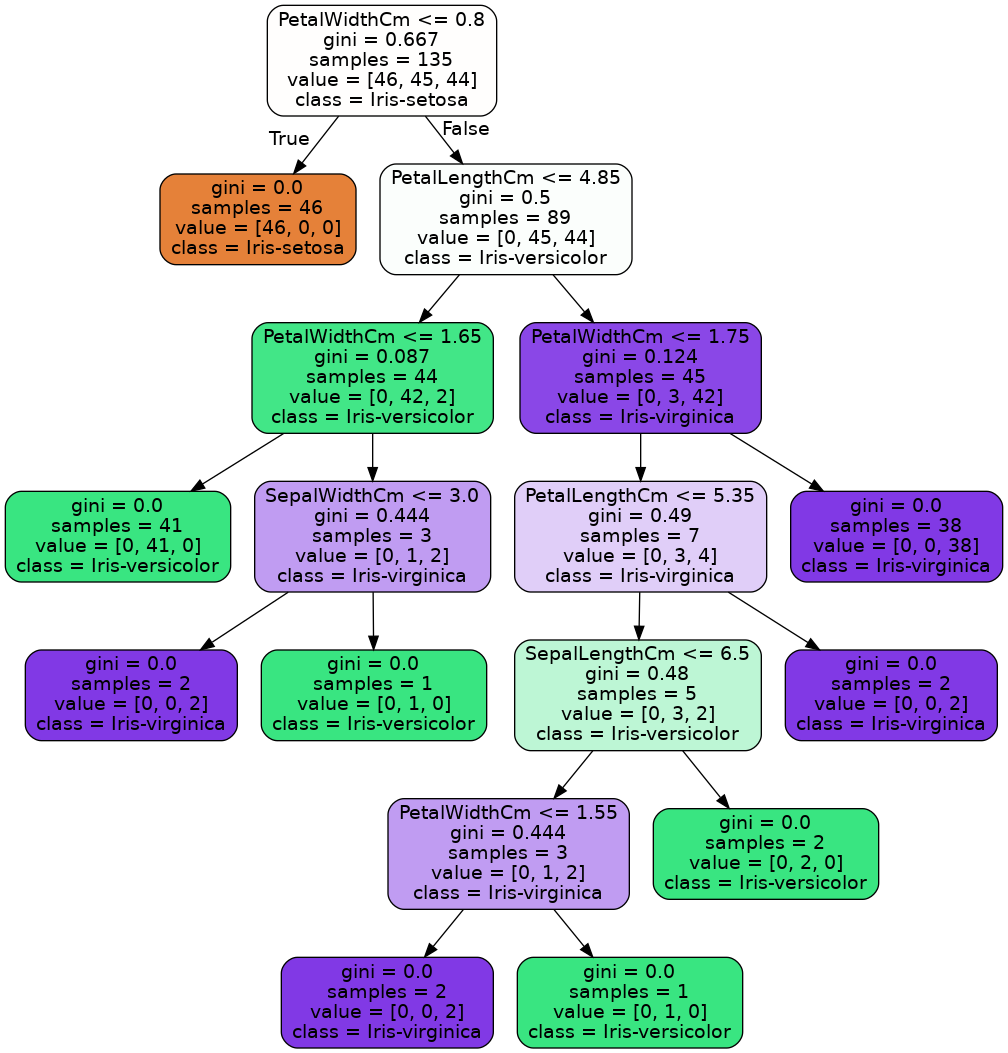

## **Latihan SKLearn Linear Regression**

**Tujuan**

Pada latihan kali ini kita akan memprediksi harga rumah berdasarkan jumlah kamar.

**Tahapan Latihan**

Berikut adalah tahapan latihan yang akan Anda lakukan:

1. Impor library yang dibutuhkan.
2. Buat dataset dummy dengan Numpy Array.
3. Buat plot dari model.

Membuat dataset

In [ ]:
import numpy as np
#buat dataset

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

In [ ]:
#menampilkan data dalam bentuk scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

mulai melatih model kita dengan memanggil fungsi LinearRegression.fit() pada data kita. Fungsi ini untuk melatih model regresi linier dari library SKLearn. 

In [ ]:
from sklearn.linear_model import LinearRegression

#latih model dengan linear regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

Terakhir kita bisa melihat bagaimana model kita menyesuaikan dengan data yang kita miliki dengan membuat plot dari model kita.

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
#mengecek harga rumah berdasarkan jumlah kamar berdasarkan Modul Regresi linear
print(linreg.predict([[5]])[0])

## **Latihan SKLearn Logistic Regression**


**Tujuan**

Pada latihan ini kita akan menggunakan logistic regression untuk memprediksi apakah seseorang akan membeli setelah melihat iklan sebuah produk. 

**Tahapan Latihan**

Tahapan yang dilalui dalam latihan kali ini adalah sebagai berikut:

1. Ubah dataset menjadi Dataframe.

2. Pisahkan atribut dan label.
3. Hapus kolom 'User ID'.
4. Latih model Logistic Regression.
5. Evaluasi akurasi model.

In [ ]:
import pandas as pd

#membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
#melihat 5 baris pertama dataset
df.head()

#melihat informasi dari dataset
#df.info()

In [ ]:
#menghapus kolom yang tidak diperlukan
data = df.drop(columns= ["User ID"])

#Jalankan proses one-hot encoding dengan pd.get_dummies()
data  = pd.get_dummies(data)
data

one shot dummies example : 

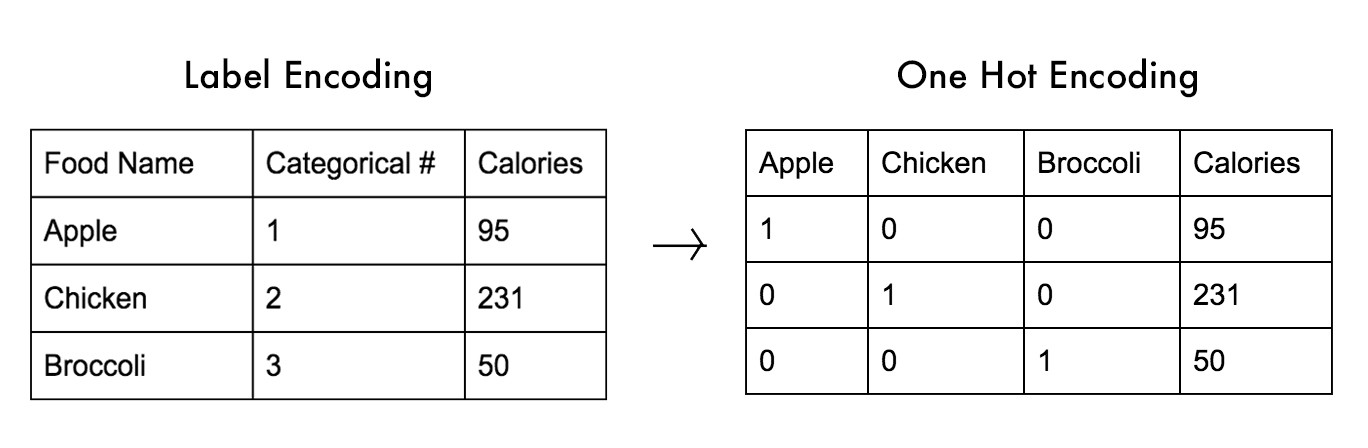

In [ ]:
#pisahkan atribut dan label
predictions = ["Age", "EstimatedSalary", "Gender_Female", "Gender_Male"]

x = data[predictions]
y = data["Purchased"]

Sebelum memisahkan data ke training dan testing, kita perlu melakukan standardisasi dikarenakan nilai estimated salary memiliki skala yang lebih tinggi dibanding umur, contoh standardisasi 

age     salary

20      10000

30      20000

setelah standardisasi

age    Salary

0.2    0.1

0.3    0.2

In [ ]:
#lakukan standardisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)
scaled_data.head()

Sekarang, kita akan membagi data menjadi train dan test set dengan fungsi train_test_split yang disediakan SKLearn.

In [ ]:
from sklearn.model_selection import train_test_split

#bagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)


Setelah membagi data, kita buat model dengan membuat sebuah objek logistic regression. Setelah model dibuat, kita bisa melatih model kita dengan train set menggunakan fungsi fit().

In [ ]:
from sklearn import linear_model

#latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
# uji akurasi model
model.score(x_test, y_test)
model.predict([["-1.781797",	"-1.490046",	"-1.020204",	"1.020204"]])[0]

# **Unsupervised Learning**


## **Latihan SKLearn K-means**

**Tujuan**

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

**Tahapan Latihan**

Tahapan pada latihan kali ini adalah sebagai berikut:

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

In [ ]:
import pandas as pd

#ubah file dataset ke dataframe
# dataset ada di folder unsupervised learning/latihan SKLearn K-Means
df = pd.read_csv("Mall_Customers.csv")

#Tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


kita akan melakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.

In [ ]:
# Ubah Nama Kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#ubah data kategore menjadi data numerik
df['gender'].replace(['Female','Male'], [0,1], inplace=True)

# Tampilkan data yang sudah di preprocessing
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [ ]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
x = df.drop(["CustomerID", 'gender'], axis=1)

# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

Jalankan kode di bawah untuk membuat plot inersia dari setiap nilai K. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5. Jangan lupa mengimpor library yang dibutuhkan untuk membuat plot ya.

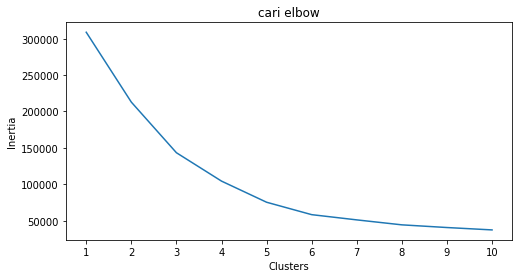

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y = clusters, ax=ax)
ax.set_title('cari elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
ax.set_xticks(range(1,11))

Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

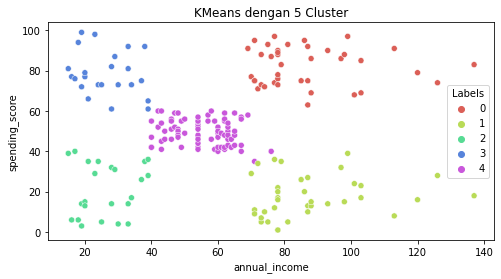

In [ ]:
# membuat objek K-Means
km5 = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 Klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

## **Latihan SKLearn PCA**

**Tujuan**

Pada latihan ini, kita akan berlatih mengimplementasi PCA dengan library SKLearn.

**Tahapan Latihan**

Tahapan pada latihan ini sebagai berikut:

1. Bagi dataset.
2. Latih model tanpa PCA.
3. Latih model dengan PCA.
4. Evaluasi hasil kedua model.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset iris
iris = datasets.load_iris()
atribut = iris.data
label = iris.target

# bagi dataset menjadi train set dan test set
x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

Kita akan menggunakan model Decision Tree dan menghitung berapa akurasinya tanpa menggunakan PCA. Akurasi tanpa PCA adalah 0.9666. Akurasi dari model Anda mungkin berbeda dengan keluaran di bawah.

In [ ]:
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.decomposition import PCA
 
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
 
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(x_train)
 
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

In [ ]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# uji akurasi classifier
model2 = decision_tree.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)

0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.